# Análisis exploratorio de datos

## 1. Introducción 

El conjunto de datos que se pretende analizar en este notebook se denomina **EXIST** y representa un problema de **detección y clasificación de sexismo** a partir de conjuntos de **textos en español e inglés** procedentes de las redes sociales **Twitter y Gab**. Esta temática surge en un formato competitivo teniendo lugar su primera edición en el año 2021 con una segunda recientemente terminada en el presente año 2022.

En este notebook se detallan los aspectos más relevantes acerca de la **composición de los conjuntos de entrenamiento y validación, así como análisis estadísticos y visuales** que ayuden a comprender tanto la temática como los datos disponibles para abordarla. Para ello se ha hecho uso de los artículos [*Overview of EXIST 2021*](http://diposit.ub.edu/dspace/bitstream/2445/181257/1/715155.pdf) y [*Overview of EXIST 2022*](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwij_P6v_dr7AhVsXqQEHVePCWIQFnoECA4QAQ&url=http%3A%2F%2Fjournal.sepln.org%2Fsepln%2Fojs%2Fojs%2Findex.php%2Fpln%2Farticle%2Fview%2F6443&usg=AOvVaw3lrB02zOxmsnIoeiyGQBqA), en los que se describe la motivación y los objetivos del problema del sexismo, los procesos de recolección de datos, normativa de la competición, evaluación de resultados y las propuestas de los participantes.

## 2. Estructura del notebook

1. Introducción al notebook
2. Estructura del notebook
3. Recopilación de datos
4. Muestreo de datos
5. Etiquetado de datos
6. Instalación y carga de librerías
7. Lectura y carga de datos
8. Análisis de características
9. Análisis de textos
10. Conclusiones finales

## 3. Recopilación de datos

El proceso de recolección de datos fue orientado primeramente a establecer un **conjunto de expresiones populares y términos sexistas**, en español e inglés, que manifiestan una infravolaración hacia el rol de la mujer en la sociedad. Para ello se inspiraron en trabajos previamente realizados en el mismo área, cuentas y hashtags populares de redes sociales, etc. A continuación se resumen los métodos de recolección de datos diferenciados por la red social tomada como fuente de datos.

### 3.1. Twitter

La recogida de datos procedentes de esta plataforma social se elaboró en **dos períodos**, una primera fase de Diciembre de 2020 hasta Febrero de 2021 para componer la **primera versión** de un dataset de entrenamiento y otro de validación. Mientras que en la **segunda edición** de la competición el objetivo consistía en **ampliar el conjunto de datos de validación** y por ende se realizó una segunda fase de recopilación de tweets durante el mes de Enero de 2022. En sendos intervalos se aplicaron **técnicas de balanceado**, como la eliminación de documentos, para equilibrar el número de textos en inglés y español.

### 3.2. Gab

Únicamente se celebró **una etapa** de recolección de datos desde **2016 hasta 2019** resultando en millones de textos en inglés, mientras que apenas se obtuvieron dos mil documentos en español. En este caso no se aplicaron técnicas de balanceado entre idiomas por lo que el conjunto de datos procedente de esta red social está prácticamente **sesgado hacia el inglés** en su totalidad.

## 4. Muestreo de datos

En esta segunda fase se pretende valorar la calidad de las muestras recopiladas en función de las expresiones y términos sexistas establecidos que componen las bases de la población de textos con la que se pretende aboradar el problema. De nuevo se llevaron a cabo dos procedimientos diferentes dependiendo de la fuente de datos.

### 4.1. Twitter

Tras diversos análisis estadísticos pudieron confirmar que el conjunto de tweets recopilados se caracterizaban por una **distribución uniforme**, por lo que para **cada expresión y término** considerados, se asignó un **volumen de tweets representativos** con los que componer un dataset de entrenamiento y otro de validación.

### 4.2. Gab

En esta segunda fuente de datos los resultados estadísticos **no** pudieron determinar la presencia de una **distribución uniforme**, por lo que el proceso de selección de instancias aplicado fue diferente. 

1. En primer lugar se **eliminaron aquellos textos con información personal** de los autores, de modo que se redujese el sesgo introducido por los usuarios. 

2. A continuación se fijaron **intervalos temporales diferenciables** para seleccionar las muestras del conjunto de entrenamiento y de validación, decrementando así el sesgo temporal existente. 

3. Posteriormente se impuso una **primera restricción** en la que **cada usuario** debía estar ligado, al menos a **un texto**, aunque en el caso de documentos españoles esta cifra se elevó a dos publicaciones por usuario. 

4. Finalmente la **segunda restricción** se basó en la única aparición de **cada usuario en un conjunto de datos**: entrenamiento o validación, para evitar que una misma cuenta perteneciese a ambos.

## 5. Etiquetado de datos

En ambas ediciones de la competición datadas en 2021 y 2022 se conformaron varios **equipos de expertos en sexismo** con diversos grados de experiencia para etiquetar manualmente los textos recopilados. En los **primeros experimentos** los expertos disponían de una **menor experiencia**, mientras que en las **últimas iteraciones los más experimentados** terminaban de corregir las etiquetas del conjunto final *EXIST*.

Una de las principales diferencias existentes en este procedimiento de etiquetado entre las ediciones de 2021 y 2022 fue el uso de una **plataforma de ayuda al etiquetado de datos denominada AWS MTurk** *(Amazon Mechanical Turk)* que se empleó en combinación con un equipo de expertos utilizando un sistema de voto mayoritario para elegir la clase de cada instancia. Debido a que **AWS MTurk no es capaz de procesar emojis** estos fueron **convertidos en texto** reemplazándolos por sus correspondientes descripciones en lenguaje natural.

## 6. Instalación y carga de librerías

Este apartado tiene como único propósito albergar el código de instalación y carga de las librerías necesarias para ejecutar las siguientes secciones de lectura de datos, análisis estadísticos y visuales, procesamiento de textos y técnicas de Procesamiento del Lenguaje Natural (*NLP*).

In [34]:
%%capture

# 1. pandas: lectura y carga de datos tabulares como dataframes
%pip install pandas==1.5.2
import pandas as pd

# 2. collections: uso de estructuras de datos de tipo colección
from collections import Counter

# 3. matplotlib: visualización gráfica de datos y estadísticas
%pip install matplotlib==3.6.2 
import matplotlib.pyplot as plt

# 4. NLTK: técnicas de procesamiento de textos
%pip install nltk==3.7
import nltk
# Descarga una lista de stopwords
nltk.download('stopwords')

# 5. regex: generación de  patrones para procesamiento de textos
import re

# 6. wordcloud: representación gráfica de los términos más frecuentes
%pip install wordcloud==1.8.2.2
from wordcloud import WordCloud

# 7. textblob: model to predict the sentiment of a text
%pip install textblob==0.17.1 
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /home/lidia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 7. Lectura y carga de datos

En esta segunda sección se pretende **cargar los datasets de entrenamiento y validación** procedentes de los correspondientes ficheros situados en la carpeta *data*. Al tener un **formato TSV** se deben leer como tablas aunque posteriormente se trabaje con ellos en formato *dataframe*. 

Tal y como se puede comprobar en los siguientes resultados las dimensiones de sendos conjuntos de datos se detallan a continuación:

* Conjunto de entrenamiento: **6.977 muestras**.
* Conjunto de validación: **4.368 muestras**.

In [35]:
# Lectura y carga de los datasets
training_df = pd.read_table("../data/EXIST2021_training.tsv")
testing_df = pd.read_table("../data/EXIST2021_test.tsv")

# Dimensiones de los datasets
print("Dimensiones del dataset de entrenamiento:", training_df.shape)
print("Dimensiones del dataset de validación:", testing_df.shape)

Dimensiones del dataset de entrenamiento: (6977, 7)
Dimensiones del dataset de validación: (4368, 7)


## 8. Análisis de características

Este primer análisis consiste en conocer el número de columnas, tipos de datos y significados con el objetivo de comprender los datos que se proporcionan sendos datasets. Según la información recopilada del artículo [*Overview of EXIST 2022*](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwij_P6v_dr7AhVsXqQEHVePCWIQFnoECA4QAQ&url=http%3A%2F%2Fjournal.sepln.org%2Fsepln%2Fojs%2Fojs%2Findex.php%2Fpln%2Farticle%2Fview%2F6443&usg=AOvVaw3lrB02zOxmsnIoeiyGQBqA), a continuación se detalla cuál es la naturaleza de cada una de las columnas disponibles: 

* `test_case`: columna nominal que indica la edición de la competición a la que pertenece un registro.
* `id`: columna numérica que representa un identificador único para un registro.
* `source`: columna nominal que define la fuente de la que procede un texto, Twitter o Gab.
* `language`: columna nominal que define el idioma de un texto, inglés (*en*) o español (*es*).
* `text`: columna nominal con el contenido de un texto.
* `task1`: columna nominal que representa la variable a predecir que indica si un texto es sexista (*sexist*) o no (*non-sexist*).
* `task2`: columna nominal que representa la categoría sexista a la que pertenece un texto.

A continuación se calcula la frecuencia de los valores nominales de las columnas categóricas más relevantes para abordar el problema del sexismo y acerca de ellos se pueden obtener las siguientes conclusiones:

* En el conjunto de **entrenamiento** únicamente se encuentran textos procedentes de **Twitter**.

* Se confirma de nuevo el equilibrio entre los tweets redactados en español e inglés, con un aumento liviano en los textos españoles.

* Si bien las clases *sexist* y *non-sexist* se encuentran balanceadas, hay una **ligera diferencia incremental de textos no sexistas**.

* Finalmente se puede apreciar la existencia de un **mayor número de tweets de ideología y estereotipos** sexistas, los documentos **más difíciles de detectar** por modelos de Aprendizaje Automático debido a que el nivel de sexismo presentado es inferior al de otros textos, como los de violencia de género y sexual.


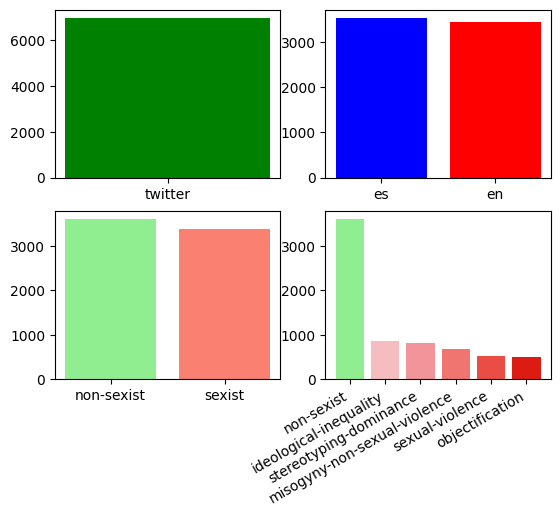

In [36]:
# Crea un grid para cuatro figuras en una matriz
fig, axs = plt.subplots(2,2)

# Columnas a analizar y sus posiciones dentro de una figura
column_chart_positions = {
    "source": (0,0), 
    "language": (0,1), 
    "task1": (1,0), 
    "task2": (1,1)
}

# Colores para las etiquetas de las columnas a graficas
column_chart_colors = {
    "source": ["green", "cyan"], 
    "language": ["blue", "red"], 
    "task1": ["lightgreen", "salmon"], 
    "task2": ["lightgreen", "#f6bdc0", "#f1959b", "#f07470", "#ea4c46", "#dc1c13"]
}

for column in column_chart_positions:
    frequency = dict(Counter(list(training_df[column].values)))
    sorted_frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
    axs[column_chart_positions[column]].bar(
        list(sorted_frequency.keys()),
        list(sorted_frequency.values()),
        color=column_chart_colors[column])
        
plt.xticks(rotation=30, ha='right')       
plt.show()

Si se replica el mismo análisis de frecuencias sobre el dataset de **validación** se pueden determinar los siguientes aspectos:

* A diferencia del conjunto de entrenamiento, en este sí que **aparecen textos procedentes de la red social Gab** aunque en una cifra sumamente **minoritaria** con respecto al número de tweets.

* Si bien el volumen de documentos en inglés y español continua siendo equilibrado, en este conjunto es el inglés el que cuenta con una mayor representatividad.

* Adicionalmente también se modifica el *ranking* de las categorías sexistas, siendo la misoginia una de las más voluminosas a diferencia del dataset de entrenamiento.

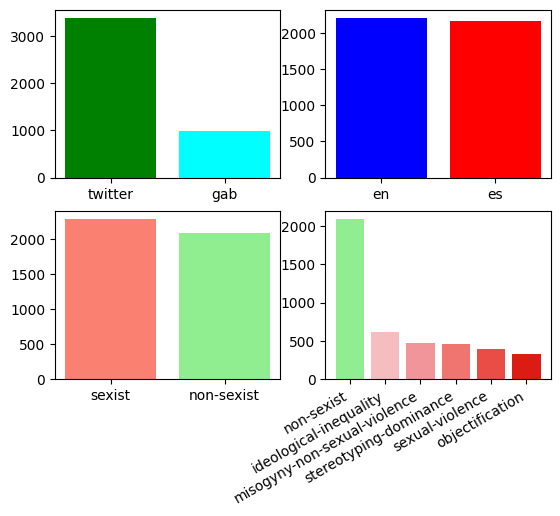

In [4]:
# Crea un grid para cuatro figuras en una matriz
fig, axs = plt.subplots(2,2)

# Columnas a analizar y sus posiciones dentro de una figura
column_chart_positions = {
    "source": (0,0), 
    "language": (0,1), 
    "task1": (1,0), 
    "task2": (1,1)
}

# Colores para las etiquetas de las columnas a graficas
column_chart_colors = {
    "source": ["green", "cyan"], 
    "language": ["blue", "red"], 
    "task1": ["salmon", "lightgreen"], 
    "task2": ["lightgreen", "#f6bdc0", "#f1959b", "#f07470", "#ea4c46", "#dc1c13"]
}

for column in column_chart_positions:
    frequency = dict(Counter(list(testing_df[column].values)))
    sorted_frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
    axs[column_chart_positions[column]].bar(
        list(sorted_frequency.keys()),
        list(sorted_frequency.values()),
        color=column_chart_colors[column])
        
plt.xticks(rotation=30, ha='right')       
plt.show()

## 9. Análisis de textos

En esta última sección el objetivo consiste en realizar diversos análisis estadísticos y visualizaciones basadas en técnicas de **Procesamiento del Lenguaje Natural** (*NLP*). Como paso previo es necesario aplicar algunos métodos de procesamiento basados en textos con los que limpiar y preparar los documentos objetivos.

### 9.1. Procesamiento de textos

Las técnicas elegidas han sido fundamentadas en **análisis exploratorios visuales de los textos** con el fin de comprobar el tipo de caracteres que contienen y el grado de información que aportan para futuros estudios.

1. Eliminar direcciones URL, menciones de usuarios y *hashtags*.
2. Eliminar todos aquellos caracteres no alfabéticos.
3. Eliminar *stopwords*, en inglés y en español, sin perder las estructuras de los textos.
4. Convertir todos los caracteres restantes a minúsculas.

In [5]:
def process_text_dataset(dataset):
    # Elimina direcciones URL
    dataset["cleaned_text"] = dataset["text"].apply(lambda x: re.split("https:\/\/.*", str(x))[0])

    # Elimina menciones de usuarios
    dataset["cleaned_text"] = dataset["cleaned_text"].str \
        .replace("@([a-zA-Z0-9_]{1,50})", "", regex=True) 
    
    # Elimina hashtags
    dataset["cleaned_text"] = dataset["cleaned_text"].str.replace("#([a-zA-Z0-9_]{1,50})", "", regex=True)
        
    # Elimina caracteres no alfabéticos
    dataset["cleaned_text"] = dataset["cleaned_text"].str.replace("[^a-zA-Z ]", "")

    # Elimina stopwords en inglés y español sin desestructurar los textos
    stopwords = nltk.corpus.stopwords.words("spanish") + nltk.corpus.stopwords.words("english")
    dataset["cleaned_text"] = dataset["cleaned_text"].apply(
        lambda x: " ".join([word for word in x.split() if word not in stopwords and len(stopwords) > 1]))

    # Convierte todos los caracteres a minúsculas
    dataset["cleaned_text"] = dataset["cleaned_text"].str.lower()

    return dataset

### 9.2. Análisis estadísticos basados en texto

El propósito de esta sección consiste en mostrar gráficos estadísticos acerca de la **distribución de caracteres y palabras** considerando tanto los textos originales como documentos procesados. Este procedimiento será aplicado sobre sendos conjuntos de datos, entrenamiento y validación, con el fin de comprobar si existen diferencias significativas entre ambos datasets que deban ser consideradas en sus respectivas fases durante el entrenamiento de modelos.

#### 9.2.1. Frecuencia de caracteres

Comienza el análisis empleando el **conjunto de entrenamiento**. Observando la figura superior izquierda se puede apreciar que en la distribución de los **textos originales** las **mayores frecuencias** se concentran al **comienzo del intervalo**, lo que indica que prácticamente la totalidad de los documentos disponen de entre 0 y 300 caracteres. Una explicación lógica reside en la **limitación de caracteres** que presenta la única fuente de datos de la que proceden los textos: Twitter. Sin embargo, en figura inferior izquierda se puede afirmar que el **procesamiento de textos** parece aportar dos principales ventajas: ayuda a **reducir el número de caracteres** total y a **normalizar las frecuencias** de caracteres puesto que su distribución presenta unas cifras más equitativas, favoreciendo la diversidad y flexibilizando la naturaleza de los textos.

Replicando el mismo procedimiento sobre el **conjunto de validación** se aprecia una disminución bastante drástica acerca de las diferencias de **distribuciones de los textos originales y procesados** puesto que prácticamente **son idénticas**. En ambos casos la inmensa mayoría de documentos se caracterizan por tener una **menor longitud** que los textos de entrenamiento.

/tmp/ipykernel_9265/1986359347.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["cleaned_text"] = dataset["cleaned_text"].str.replace("[^a-zA-Z ]", "")
/tmp/ipykernel_9265/1986359347.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["cleaned_text"] = dataset["cleaned_text"].str.replace("[^a-zA-Z ]", "")


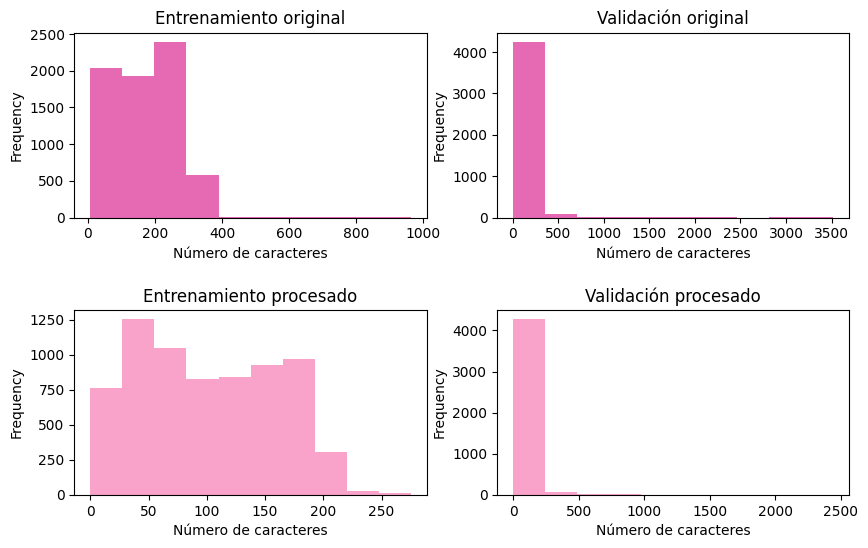

In [6]:
# Procesamiento de textos en el conjunto de entrenamiento
training_df = process_text_dataset(training_df)

# Procesamiento de textos en el conjunto de entrenamiento
testing_df = process_text_dataset(testing_df)

# Crea un grid para cuatro figuras en una matriz
fig, ax = plt.subplots(2, 2, figsize=(10,6))

# Etiquetas para los ejes X e Y
ax[0][0].set_xlabel("Número de caracteres")
ax[0][1].set_xlabel("Número de caracteres")
ax[1][0].set_xlabel("Número de caracteres")
ax[1][1].set_xlabel("Número de caracteres")

# Gráfico de frecuencia de caracteres para textos originales
training_df["text"].str.len().plot(
    ax=ax[0][0],
    kind="hist", 
    grid=False, 
    color="#e56ab3", 
    title="Entrenamiento original")

# Gráfico de frecuencia de caracteres para textos procesados
training_df["cleaned_text"].str.len().plot(
    ax=ax[1][0],
    kind="hist", 
    grid=False, 
    color="#f9a3cb", 
    title="Entrenamiento procesado")

# Gráfico de frecuencia de caracteres para textos originales
testing_df["text"].str.len().plot(
    ax=ax[0][1],
    kind="hist", 
    grid=False, 
    color="#e56ab3", 
    title="Validación original")

# Gráfico de frecuencia de caracteres para textos procesados
testing_df["cleaned_text"].str.len().plot(
    ax=ax[1][1],
    kind="hist", 
    grid=False, 
    color="#f9a3cb", 
    title="Validación procesado")

# Añade espacio vertical entre gráficos
fig.subplots_adjust(hspace=0.5)

#### 9.2.2. Frecuencia de palabras

De nuevo se replica el mismo esquema de imágenes anterior con una tendencia prácticamente similar en la distribución de palabras. En las imágenes que muestran el **conjunto de entrenamiento** se puede apreciar una cierta **normalización tras el procesamiento** que permite tanto la disminución de la concentración de textos con pocas palabras como el número de términos global. Mientras que por otro lado existe la misma tónica en el **conjunto de validación sin** notar apenas **diferencias** entre los **datos originales y procesados**.

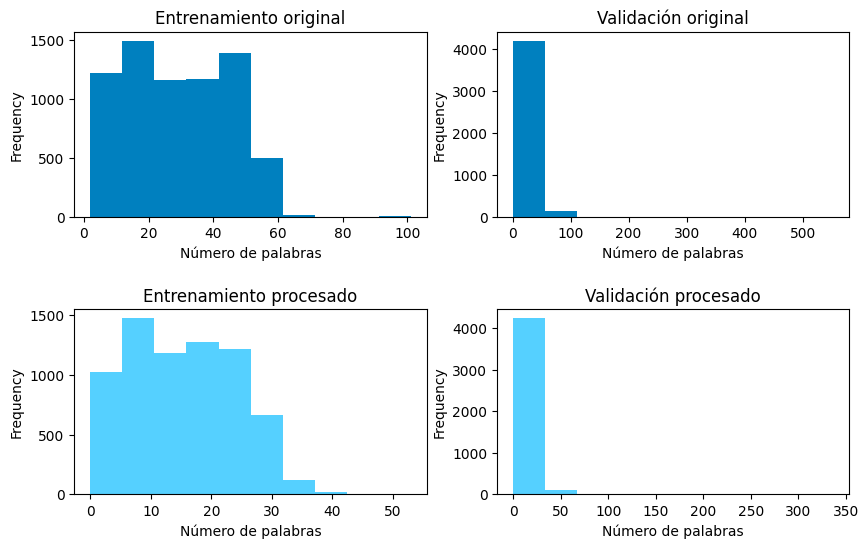

In [7]:
# Crea un grid para cuatro figuras en una matriz
fig, ax = plt.subplots(2, 2, figsize=(10,6))

# Etiquetas para los ejes X e Y
ax[0][0].set_xlabel("Número de palabras")
ax[0][1].set_xlabel("Número de palabras")
ax[1][0].set_xlabel("Número de palabras")
ax[1][1].set_xlabel("Número de palabras")

# Gráfico de frecuencia de palabras para textos originales
(training_df["text"].str.split().map(lambda x: len(x))).plot(
    ax=ax[0][0],
    kind="hist", 
    grid=False, 
    color="#0080bf", 
    title="Entrenamiento original")

# Gráfico de frecuencia de palabras para textos procesados
(training_df["cleaned_text"].str.split().map(lambda x: len(x))).plot(
    ax=ax[1][0],
    kind="hist", 
    grid=False, 
    color="#55d0ff", 
    title="Entrenamiento procesado")

# Gráfico de frecuencia de palabras para textos originales
(testing_df["text"].str.split().map(lambda x: len(x))).plot(
    ax=ax[0][1],
    kind="hist", 
    grid=False, 
    color="#0080bf", 
    title="Validación original")

# Gráfico de frecuencia de palabras para textos procesados
(testing_df["cleaned_text"].str.split().map(lambda x: len(x))).plot(
    ax=ax[1][1],
    kind="hist", 
    grid=False, 
    color="#55d0ff", 
    title="Validación procesado")

# Añade espacio vertical entre gráficos
fig.subplots_adjust(hspace=0.5)

### 9.3. Nube de palabras

En este subapartado se pretende representar gráficamente los **términos de mayor frecuencia** empleando el conjunto de **datos procesados**, puesto que al contener únicamente las palabras que en principio aportan más información útil, el resultado será estadísticamente más significativo. Tal y como se aprecia en la siguiente nube de palabras, en el conjunto de **entrenamiento** destacan principalmente por su tamaño los términos relacionados a los **dos géneros** principales: hombres y mujeres. Una posible teoría podría ser la existencia tanto de frases que alaban al sexo masculino como otras que degradan al género femenino. Adicionalmente aparecen en un mayor tamaño **verbos comunes** tales como *ser*, *mirar/parecer*, *hacer*... muy relacionados con la mayoría de expresiones denigrantes y violentas contra las mujeres.

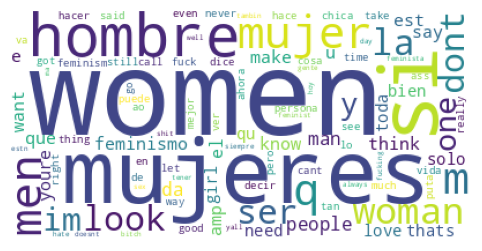

In [8]:
# Configuración de una nube de palabras
# - Fondo blanco
# - Máximo 100 términos
word_cloud_object = WordCloud(
    background_color="white",
    max_words=100)

# Genera una nube de palabras con el conjunto de entrenamiento procesado
training_wordcloud = word_cloud_object.generate(str(list(training_df["cleaned_text"].values)))

# Configuración de la gráfica de la nube de palabras
fig = plt.figure(1, figsize=(10,3))
plt.axis('off')
plt.imshow(training_wordcloud)
plt.show()

En la siguiente gráfica se aprecia la **misma tendencia** con el conjunto de **validación procesado** siendo viable la aplicación de las conclusiones obtenidas anteriormente.

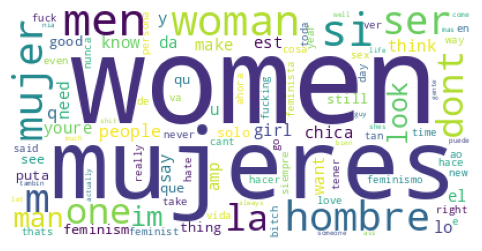

In [9]:
# Configuración de una nube de palabras
# - Fondo blanco
# - Máximo 100 términos
word_cloud_object = WordCloud(
    background_color="white",
    max_words=100)

# Genera una nube de palabras con el conjunto de validación procesado
wordcloud = word_cloud_object.generate(str(list(testing_df["cleaned_text"].values)))

# Configuración de la gráfica de la nube de palabras
fig = plt.figure(1, figsize=(10,3))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### 9.4. Análisis de n-gramas

Con la siguiente función se persigue el propósito de dividir los documentos de **entrenamiento** en un conjunto de frases con hasta **N palabras** de modo que se pueda calcular y conocer la **frecuencia de las expresiones** resultantes. Pueden ser tanto bigramas con dos palabras, trigramas con tres conceptos y así hasta el número de términos deseado. Tras realizar diversas pruebas, a mayor valor mejor comprensión de los temas que tratan las expresiones más frecuentes, y por ende se establece este valor a 10.

En el conjunto de **entrenamiento** únicamente se encuentran opiniones de usuarios de **Twitter** y por lo tanto las temáticas son de diversa índole, como comentarios machistas acerca de los **cuerpos de las mujeres y los roles** que pueden desempeñar. Sin embargo, los 10-gramas resultantes en el conjunto de **validación** en el que existen más fuentes de datos parece existir una **mayor amplitud de tópicos** siendo los mayoritarios **noticias** acerca de violencia hacia la mujeres.

In [10]:
def get_top_ngrams(dataset, n):
    # Divide los textos en frases de 'n' palabras
    dataset["ngrams"] = dataset["cleaned_text"].str \
        .split() \
        .apply(lambda x: list(map(" ".join, nltk.ngrams(x, n=n))))

    # Calcula la frecuencia de las frases resultantes
    return (dataset.\
        assign(count=dataset["ngrams"].str.len()) \
        .explode("ngrams")) \
        .sort_values("count", ascending=False)

In [11]:
# Top 20 10-gramas más frecuentes del conjunto de entrenamiento
list(get_top_ngrams(training_df, 10).drop_duplicates(subset=["cleaned_text"])["ngrams"].values)[0:20]

['at last so subscribe now and take the journey to',
 'pesebresi en realidad la navidad es un recordatorio de ese',
 'persona que dice escribir yque sabe lo que dice solo',
 'y lil smith por sus consejos e informaciones pedro brito',
 'espacioso el camino que lleva a la perdicin y son',
 'justo que gane una mujer que esta mintiendo por segunda',
 'las pibas q muriern por culpa de los abortos clandestinos',
 'ok to grab a woman anywhere on their body especially',
 'por mas que se resistan somos mujeres libres y tenemos',
 'come class dey ask staph women dey remove bra peei',
 'jacobque casualmenteerael unico en su univrso paraleloque teniaacceso a tu',
 'genocidano se conmueve de asesinar todos los dias a nios',
 'la iglesia en la antigedad apedreaban a las infieles en',
 'no trabaja menudo trabajo andar buscando negros transexuales ms difcil',
 'ella es un solcito como le vas a decir algo',
 'lost yet another case time in wisconsinhe and no i',
 'eu tenho jaehyunj john wayne lady gagaa

In [12]:
# Top 20 10-gramas más frecuentes del conjunto de entrenamiento
list(get_top_ngrams(testing_df, 10).drop_duplicates(subset=["cleaned_text"])["ngrams"].values)[0:20]

['tie stopping shipments bargaining china noko giving away young adults',
 'jews course individually collectively intentionally destroying christianity world wide push',
 'delay cause problems different place social fabric numerous severe ones',
 'frenar expansionismo sovitico fomentar cooperacin desarrollo econmico pases rea occidental',
 'expertos reclutados altas esfera cientficas acadmicas vinculados figuras clave poltica',
 'in jew named moses nunis became first person initiated freemasonry',
 'mention reasons might like badboy center around security world thats',
 'arse like synogogues cash moneys used fund genetic jews people',
 'sodomize homosexualize psychically actualknow if homosexuals even allowed table obviously',
 'secreto reclutado amrica latina cia comenz trabajar estrecha colaboracin argentinos',
 'detenido barcelona acusado dos violaciones consumadas grado tentativa libans droga',
 'defensa cumplir deber sacando tajada situacin pese haba claro menoscabando',
 'definic

### 9.5. Análisis de sentimientos

Finalizando el análisis exploratorio se procede a identificar el **sentimiento de cada texto** para comprobar la polaridad existente **por categorías**. Presumiblemente la hipótesis más factible es que la mayor parte de documentos fuesen clasificados como negativos, a excepción de la categoría *non-sexist*. Si bien existen multitud de mecanismos de **detección de sentimientos**, en este EDA se procede a utilizar un **modelo SVM pre-entrenado** perteneciente a la librería *textblob*.

In [25]:
def get_sentiments(dataset):
    # Obtiene las categorías en las que se dividen los textos
    unique_classes = list(set(list(dataset["task2"].values)))

    # Itera por cada clase
    for class_ in unique_classes:

        # Obtiene los textos únicamente pertenecientes a la clase actual
        one_class_texts = list(dataset[dataset["task2"] == class_]["cleaned_text"].values)

        # Identifica el sentimiento de cada texto resultante
        # - Positivo si polarity > 0
        # - Negativo si polarity < 0
        # - Neutral si polatiry = 0
        one_class_sentiments = [
            "pos" if TextBlob(text).polarity > 0 else (
            "neg" if TextBlob(text).polarity < 0 
            else "neu") for text in one_class_texts]

        # Cuenta el número de apariciones de cada sentimiento
        one_class_sentiment_frequencies = {sentiment:one_class_sentiments.count(sentiment) 
            for sentiment in ["pos", "neg", "neu"]}

        # Ordena los sentimientos por la frecuencia de aparición
        print(f"Sentimientos de la clase {class_}: ", 
            dict(sorted(one_class_sentiment_frequencies.items(), key=lambda item: item[1], reverse=True)))

Tal y como se aprecia en el siguiente resultado empleando el conjunto de **entrenamiento**, en todas las categorías el **sentimiento predominante es el neutral** por una amplia diferencia de documentos. Adicionalmente, el segundo sentimiento mayoritario es el positivo a excepción de la clase *misogyny-non-sexual-violence*. Si bien una primera explicación de este fenómeno podría residir en la falta de precisión del modelo pre-entrenado, gracias a los artículos relacionados con la temática conocemos la especial **dificultad** que residen en la **detección y clasificación del sexismo**. Al ser altamente **dependiente del lenguaje**, a menos que se utilicen expresiones y términos considerablemente negativos y violentos, la identificación de textos puede llegar a ser una actividad muy confusa para un sistema automático.

In [26]:
get_sentiments(training_df)

Sentimientos de la clase misogyny-non-sexual-violence:  {'neu': 453, 'neg': 124, 'pos': 108}
Sentimientos de la clase sexual-violence:  {'neu': 232, 'pos': 178, 'neg': 107}
Sentimientos de la clase ideological-inequality:  {'neu': 527, 'pos': 189, 'neg': 150}
Sentimientos de la clase non-sexist:  {'neu': 2044, 'pos': 969, 'neg': 587}
Sentimientos de la clase objectification:  {'neu': 299, 'pos': 126, 'neg': 75}
Sentimientos de la clase stereotyping-dominance:  {'neu': 497, 'pos': 179, 'neg': 133}


Una **tendencia similar** a la anterior ocurre con el análisis de sentimientos aplicado al conjunto de **validación**, en el que el sentimiento mayoritario es el neutral para todas las clases mientras que el segundo más voluminoso es el positivo a excepción de la categoría *misogyny-non-sexual-violence*.

In [29]:
get_sentiments(testing_df)

Sentimientos de la clase misogyny-non-sexual-violence:  {'neu': 303, 'neg': 109, 'pos': 60}
Sentimientos de la clase sexual-violence:  {'neu': 219, 'pos': 114, 'neg': 67}
Sentimientos de la clase ideological-inequality:  {'neu': 337, 'pos': 160, 'neg': 124}
Sentimientos de la clase non-sexist:  {'neu': 1218, 'pos': 542, 'neg': 327}
Sentimientos de la clase objectification:  {'neu': 200, 'pos': 70, 'neg': 54}
Sentimientos de la clase stereotyping-dominance:  {'neu': 251, 'pos': 127, 'neg': 86}


## 10. Conclusiones finales

En este último apartado se recopilan los aspectos más relevantes acerca de los conjuntos de datos *EXIST* a modo resumen del notebook completo.

* **Fuentes de datos**: Twitter y Gab.
* **Método de búsqueda** por expresiones y términos sexistas, en **inglés y español**, propuestos por trabajos en áreas similares, expertos en la materia, cuentas de redes sociales, etc.
* Técnicas de **procesamiento y balanceo de idiomas** aplicadas únicamente sobre **Twitter**, ya que apenas existe población de Gab.
* **Etiquetado de datos** mediante varios equipos de expertos de menor a mayor experiencia.
* **Clases balanceadas** tanto en detección como en clasificación de sexismo.
* El conjunto de **entrenamiento** únicamente dispone de **tweets**, mientras que el de validación se compone de documentos procedentes de sendas fuentes de datos.
* Técnicas de **procesamiento de textos** ayudan a **normalizar y reducir** el número y frecuencia tanto de caracteres como de palabras.
* En el conjunto de **validación** existe una mayor diversidad de documentos, siendo en su mayoría **noticias** sobre **violencia de género**.
* Prácticamente la totalidad de los **documentos** son clasificados como **neutrales** por su falta de negatividad y violencia en sus términos, lo que parece que dificultará su detección en este problema de clasificación.